In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-71-12671cc18a50>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


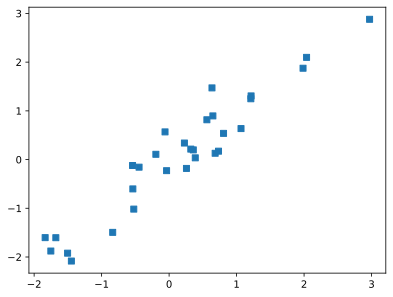

In [122]:
n=30
x=torch.randn(n,1)
y=x+torch.randn(n,1)/2

plt.plot(x,y,'s')

#Creat ANN model

In [123]:
annreg=nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
annreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

#Calculate Loss Function of ANN Model

In [124]:
lr=.01

lossfunc=nn.MSELoss()

optimizer=torch.optim.SGD(annreg.parameters(),lr=lr)

#Train ANN Model

In [125]:
numepochs=1000

losses=torch.zeros(numepochs)

for epochi in range(numepochs):

  yhat=annreg(x)

  loss=lossfunc(yhat,y)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#Plot the Loss Function of ANN Model

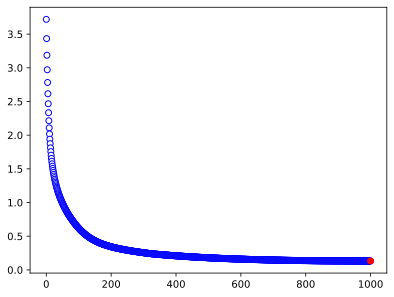

In [126]:
pred=annreg(x)

totalpred=(pred-y).pow(2).mean()

plt.plot(losses.detach(),'bo',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,totalpred.detach(),'ro')

In [127]:
print(totalpred.item())
print(totalpred.detach())

0.13214260339736938
tensor(0.1321)


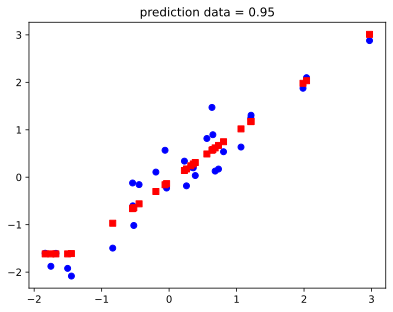

In [128]:
plt.plot(x,y,'bo',label='real data')
plt.plot(x,pred.detach(),'rs',label='prediction')
plt.title(f'prediction data = {np.corrcoef(y.T,pred.detach().T)[0,1]:.2f}')
plt.show()